# Cutomer Churn detector using Deep Learning

* Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('churn/Churn_Modelling.csv')

In [3]:
#Reading the first five data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.shape

(10000, 14)

# Some Exploratory Data Analysis

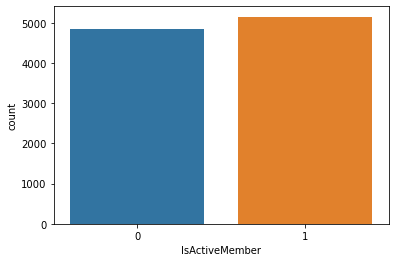

In [6]:
sns.countplot(x="IsActiveMember",data=df);

* We can cleary see that number of number of active member is almost 5000 whereas non-active members are below 5000

In [7]:
pd.crosstab(df['HasCrCard'],df['Exited'])

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


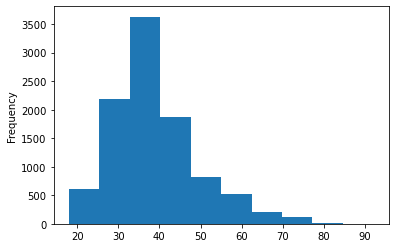

In [8]:
df['Age'].plot.hist();

# Age attribute are slightly right distributed so we can see some skewness here

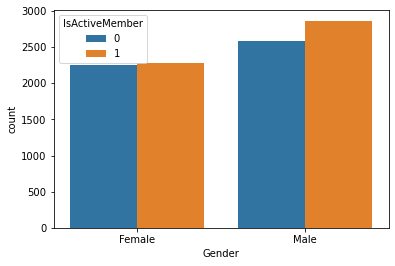

In [9]:
sns.countplot(x="Gender",hue="IsActiveMember",data=df);

## Here, for non-active member, both the male and female have same number of count, however, for the active group we can see that Male are more in active than female

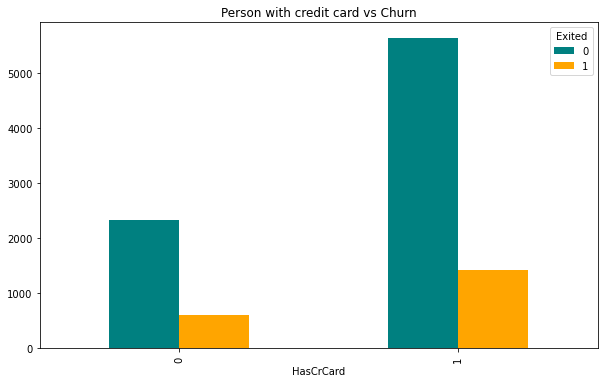

In [10]:
pd.crosstab(df['HasCrCard'],df['Exited']).plot(kind="bar",color=['teal','orange'],figsize=(10,6));
plt.title("Person with credit card vs Churn");

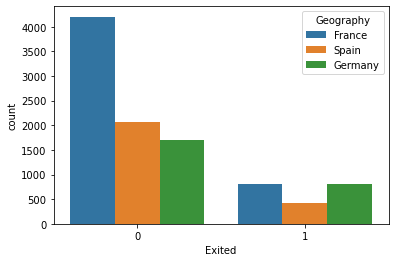

In [11]:
sns.countplot(x="Exited",hue="Geography",data=df);

* Our data has total 10000 total rows and total 14 columns

In [12]:
# Seperating the data between features and target where X is our feature and y is our target
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [13]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Let's check how many of our columns represent the string value so that we can convert them using dummy variable

In [15]:
for label,content in X.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Geography
Gender


In [16]:
geography = pd.get_dummies(X['Geography'],drop_first=True)

In [17]:
gender = pd.get_dummies(X['Gender'],drop_first=True)

## We will concate our encoded string value

In [18]:
X = pd.concat([X,geography,gender],axis=1)

## Since we concated geography and gender we don not need Geography and Gender column as it creates redundancy in the dataset which is a problem for machine learning and deep learning 

In [19]:
X = X.drop(labels=['Geography','Gender'],axis=1)

In [20]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Splitting the data inot training and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


# As we can see that there are diiferent attributes which have different magnitude of value, let's scale down our data into common magnitude

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [25]:
X_test = sc.transform(X_test)

# Now comes the most exciting part, that is we are going to train our model using ANN(Artificial Neural Network), for that we will be using keras

In [26]:
#Let's make start making ANN
import keras

In [27]:
# from keras.models import Sequential

In [28]:
# from keras.layers import Dense

In [29]:
# from keras.layers import LeakyReLU,PReLU

# Let's import tensorflow, one of the most popular deep learning library which helps in mathematical calculation

In [30]:
from keras.layers import Dropout
import tensorflow as tf

* Since neural network work in step by step i.e. it first performs forward propagation and then it performs backward propagation also called one epoch, so we consider our model as sequential

In [31]:
#Initializing the ANN
classifier = keras.models.Sequential()

In [32]:
# Adding the input layer and the first hidden layer
classifier.add(tf.keras.layers.Dense(10,kernel_initializer="he_normal",input_dim=11,activation='relu'))
#Adding dropout
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(tf.keras.layers.Dense(20,kernel_initializer="he_normal", activation='relu'))
classifier.add(Dropout(0.4))
# Adding the third hidden layer
classifier.add(tf.keras.layers.Dense(50,kernel_initializer="he_normal", activation='relu'))
classifier.add(Dropout(0.2))
#Adding the ouput layer
classifier.add(tf.keras.layers.Dense(1,kernel_initializer="glorot_uniform", activation='sigmoid'))


In [33]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

In [34]:
#Compiling the ANN to the Training Set
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [35]:
history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.6580 - accuracy: 0.7333 - val_loss: 0.5045 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7832 - val_loss: 0.4936 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5162 - accuracy: 0.7899 - val_loss: 0.4847 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4994 - accuracy: 0.7957 - val_loss: 0.4802 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4879 - accuracy: 0.7949 - val_loss: 0.4706 - val_accuracy: 0.7910
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4768 - accuracy: 0.7975 - val_loss: 0.4578 - val_accuracy: 0.7921
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4640 - accuracy: 0.7974 - val_loss: 0.4471 - val_accuracy: 0.7944

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3635 - accuracy: 0.8517 - val_loss: 0.3819 - val_accuracy: 0.8270
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3603 - accuracy: 0.8522 - val_loss: 0.3815 - val_accuracy: 0.8224
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3628 - accuracy: 0.8548 - val_loss: 0.3782 - val_accuracy: 0.8311
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3606 - accuracy: 0.8561 - val_loss: 0.3802 - val_accuracy: 0.8289
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3641 - accuracy: 0.8509 - val_loss: 0.3868 - val_accuracy: 0.8126
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3632 - accuracy: 0.8457 - val_loss: 0.3784 - val_accuracy: 0.8247
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3620 - accuracy: 0.8520 - val_loss: 0.3724 - val_accuracy:

In [36]:
y_predict = classifier.predict(X_test)

In [37]:
y_predict = (y_predict>0.5)

In [38]:
y_predict

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_predict)

array([[1581,   26],
       [ 271,  122]], dtype=int64)

In [40]:
score = accuracy_score(y_predict,y_test)

In [41]:
score

0.8515

In [42]:
import seaborn as sns

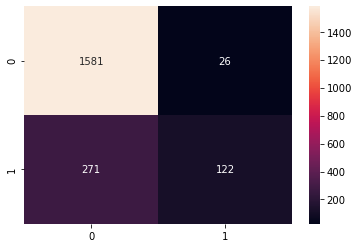

In [43]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='d');

In [44]:
#Summarize history for accuray

In [45]:
history.history

{'loss': [0.6579983830451965,
  0.533667266368866,
  0.5161811709403992,
  0.4994211494922638,
  0.4879224896430969,
  0.4768391251564026,
  0.4639812707901001,
  0.45422255992889404,
  0.45051175355911255,
  0.44178545475006104,
  0.4397967755794525,
  0.43084993958473206,
  0.43658971786499023,
  0.43137025833129883,
  0.42377522587776184,
  0.4270116090774536,
  0.42194420099258423,
  0.42030254006385803,
  0.41031110286712646,
  0.4174312651157379,
  0.40623223781585693,
  0.4024302661418915,
  0.4030500650405884,
  0.41057172417640686,
  0.4002065360546112,
  0.395583838224411,
  0.3984488546848297,
  0.39064672589302063,
  0.3922742009162903,
  0.38294315338134766,
  0.38517841696739197,
  0.38435059785842896,
  0.38336992263793945,
  0.37702393531799316,
  0.3822256326675415,
  0.3783135712146759,
  0.37576326727867126,
  0.37480202317237854,
  0.3701414167881012,
  0.37783941626548767,
  0.37271079421043396,
  0.36925649642944336,
  0.36944329738616943,
  0.3739176392555237,
  

In [46]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.657998,0.733346,0.504542,0.790988
1,0.533667,0.783168,0.493635,0.790988
2,0.516181,0.789886,0.484662,0.790988
3,0.499421,0.795671,0.480211,0.790988
4,0.487922,0.794924,0.470584,0.790988
...,...,...,...,...
95,0.354200,0.853331,0.372845,0.837183
96,0.349248,0.858929,0.375886,0.828853
97,0.350241,0.856690,0.372644,0.843998
98,0.357465,0.852584,0.379563,0.830746


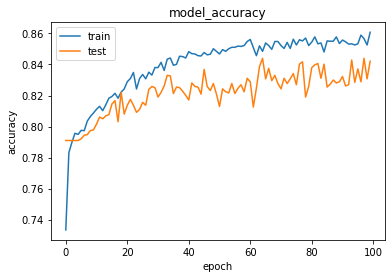

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left");

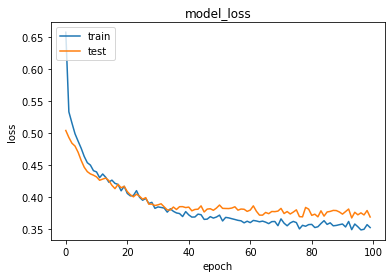

In [48]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left");


In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [50]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [54]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='dir',
    project_name='Santosh Directory')

In [55]:
tuner.search_space_summary()

In [56]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.68 - ETA: 0s - loss: 0.5754 - accuracy: 0.81 - ETA: 0s - loss: 0.5399 - accuracy: 0.79 - ETA: 0s - loss: 0.5099 - accuracy: 0.79 - ETA: 0s - loss: 0.4977 - accuracy: 0.79 - ETA: 0s - loss: 0.4816 - accuracy: 0.79 - ETA: 0s - loss: 0.4768 - accuracy: 0.79 - ETA: 0s - loss: 0.4709 - accuracy: 0.79 - ETA: 0s - loss: 0.4712 - accuracy: 0.79 - ETA: 0s - loss: 0.4630 - accuracy: 0.80 - ETA: 0s - loss: 0.4547 - accuracy: 0.80 - ETA: 0s - loss: 0.4443 - accuracy: 0.81 - 1s 5ms/step - loss: 0.4430 - accuracy: 0.8120 - val_loss: 0.3877 - val_accuracy: 0.8340
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.4066 - accuracy: 0.81 - ETA: 0s - loss: 0.3987 - accuracy: 0.82 - ETA: 0s - loss: 0.3809 - accuracy: 0.84 - ETA: 0s - loss: 0.3876 - accuracy: 0.83 - ETA: 0s - loss: 0.3756 - accuracy: 0.84 - ETA: 0s - loss: 0.3764 - accuracy: 0.84 - ETA: 0s - loss: 0.3618 - accuracy: 0.85 - ETA: 0s 

250/250 [==============================] - ETA: 0s - loss: 0.4058 - accuracy: 0.81 - ETA: 0s - loss: 0.3546 - accuracy: 0.86 - ETA: 0s - loss: 0.3677 - accuracy: 0.84 - ETA: 0s - loss: 0.3702 - accuracy: 0.84 - ETA: 0s - loss: 0.3608 - accuracy: 0.85 - ETA: 0s - loss: 0.3633 - accuracy: 0.85 - ETA: 0s - loss: 0.3667 - accuracy: 0.85 - ETA: 0s - loss: 0.3619 - accuracy: 0.85 - ETA: 0s - loss: 0.3655 - accuracy: 0.85 - ETA: 0s - loss: 0.3646 - accuracy: 0.85 - ETA: 0s - loss: 0.3663 - accuracy: 0.84 - ETA: 0s - loss: 0.3638 - accuracy: 0.85 - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8499 - val_loss: 0.3594 - val_accuracy: 0.8540
Epoch 3/5
250/250 [==============================] - ETA: 0s - loss: 0.4859 - accuracy: 0.78 - ETA: 0s - loss: 0.3430 - accuracy: 0.84 - ETA: 0s - loss: 0.3600 - accuracy: 0.84 - ETA: 0s - loss: 0.3502 - accuracy: 0.84 - ETA: 0s - loss: 0.3423 - accuracy: 0.85 - ETA: 0s - loss: 0.3545 - accuracy: 0.85 - ETA: 0s - loss: 0.3491 - accuracy: 0.85 - ETA: 0s - loss: 0.

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6962 - accuracy: 0.21 - ETA: 1s - loss: 0.6201 - accuracy: 0.75 - ETA: 1s - loss: 0.5647 - accuracy: 0.77 - ETA: 1s - loss: 0.5552 - accuracy: 0.77 - ETA: 1s - loss: 0.5508 - accuracy: 0.76 - ETA: 1s - loss: 0.5315 - accuracy: 0.77 - ETA: 1s - loss: 0.5130 - accuracy: 0.77 - ETA: 1s - loss: 0.5073 - accuracy: 0.77 - ETA: 0s - loss: 0.4963 - accuracy: 0.77 - ETA: 0s - loss: 0.4945 - accuracy: 0.78 - ETA: 0s - loss: 0.4884 - accuracy: 0.78 - ETA: 0s - loss: 0.4853 - accuracy: 0.78 - ETA: 0s - loss: 0.4750 - accuracy: 0.78 - ETA: 0s - loss: 0.4666 - accuracy: 0.79 - ETA: 0s - loss: 0.4645 - accuracy: 0.79 - ETA: 0s - loss: 0.4610 - accuracy: 0.79 - ETA: 0s - loss: 0.4617 - accuracy: 0.79 - ETA: 0s - loss: 0.4593 - accuracy: 0.79 - ETA: 0s - loss: 0.4572 - accuracy: 0.79 - ETA: 0s - loss: 0.4571 - accuracy: 0.79 - ETA: 0s - loss: 0.4550 - accuracy: 0.79 - ETA: 0s - loss: 0.4526 - accuracy: 0.79 - ETA: 0s - loss: 0.4538 

250/250 [==============================] - ETA: 0s - loss: 0.3272 - accuracy: 0.96 - ETA: 1s - loss: 0.3456 - accuracy: 0.87 - ETA: 1s - loss: 0.3880 - accuracy: 0.84 - ETA: 1s - loss: 0.4001 - accuracy: 0.82 - ETA: 1s - loss: 0.3971 - accuracy: 0.82 - ETA: 1s - loss: 0.3999 - accuracy: 0.82 - ETA: 1s - loss: 0.4019 - accuracy: 0.82 - ETA: 1s - loss: 0.4010 - accuracy: 0.82 - ETA: 0s - loss: 0.3929 - accuracy: 0.82 - ETA: 0s - loss: 0.3887 - accuracy: 0.83 - ETA: 0s - loss: 0.3894 - accuracy: 0.82 - ETA: 0s - loss: 0.3935 - accuracy: 0.82 - ETA: 0s - loss: 0.3934 - accuracy: 0.82 - ETA: 0s - loss: 0.3978 - accuracy: 0.82 - ETA: 0s - loss: 0.4018 - accuracy: 0.82 - ETA: 0s - loss: 0.3990 - accuracy: 0.82 - ETA: 0s - loss: 0.3991 - accuracy: 0.82 - ETA: 0s - loss: 0.3977 - accuracy: 0.83 - ETA: 0s - loss: 0.3966 - accuracy: 0.83 - ETA: 0s - loss: 0.3948 - accuracy: 0.83 - ETA: 0s - loss: 0.3985 - accuracy: 0.83 - ETA: 0s - loss: 0.4001 - accuracy: 0.83 - ETA: 0s - loss: 0.4029 - accuracy

250/250 [==============================] - ETA: 0s - loss: 0.2864 - accuracy: 0.87 - ETA: 1s - loss: 0.3975 - accuracy: 0.82 - ETA: 1s - loss: 0.4246 - accuracy: 0.80 - ETA: 1s - loss: 0.4385 - accuracy: 0.79 - ETA: 1s - loss: 0.4291 - accuracy: 0.79 - ETA: 1s - loss: 0.4240 - accuracy: 0.80 - ETA: 1s - loss: 0.4190 - accuracy: 0.81 - ETA: 1s - loss: 0.4093 - accuracy: 0.81 - ETA: 1s - loss: 0.4122 - accuracy: 0.82 - ETA: 0s - loss: 0.4182 - accuracy: 0.81 - ETA: 0s - loss: 0.4098 - accuracy: 0.82 - ETA: 0s - loss: 0.4107 - accuracy: 0.82 - ETA: 0s - loss: 0.4065 - accuracy: 0.83 - ETA: 0s - loss: 0.4079 - accuracy: 0.82 - ETA: 0s - loss: 0.4043 - accuracy: 0.82 - ETA: 0s - loss: 0.4046 - accuracy: 0.83 - ETA: 0s - loss: 0.4036 - accuracy: 0.83 - ETA: 0s - loss: 0.4002 - accuracy: 0.83 - ETA: 0s - loss: 0.3954 - accuracy: 0.83 - ETA: 0s - loss: 0.3965 - accuracy: 0.83 - ETA: 0s - loss: 0.3954 - accuracy: 0.83 - ETA: 0s - loss: 0.3944 - accuracy: 0.83 - ETA: 0s - loss: 0.3906 - accuracy

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6823 - accuracy: 0.65 - ETA: 0s - loss: 0.6919 - accuracy: 0.76 - ETA: 0s - loss: 0.5875 - accuracy: 0.78 - ETA: 0s - loss: 0.5613 - accuracy: 0.77 - ETA: 0s - loss: 0.5200 - accuracy: 0.79 - ETA: 0s - loss: 0.5021 - accuracy: 0.80 - ETA: 0s - loss: 0.4819 - accuracy: 0.80 - ETA: 0s - loss: 0.4722 - accuracy: 0.81 - ETA: 0s - loss: 0.4661 - accuracy: 0.81 - ETA: 0s - loss: 0.4604 - accuracy: 0.81 - ETA: 0s - loss: 0.4572 - accuracy: 0.81 - ETA: 0s - loss: 0.4566 - accuracy: 0.81 - ETA: 0s - loss: 0.4529 - accuracy: 0.81 - ETA: 0s - loss: 0.4502 - accuracy: 0.81 - ETA: 0s - loss: 0.4440 - accuracy: 0.82 - ETA: 0s - loss: 0.4437 - accuracy: 0.81 - ETA: 0s - loss: 0.4433 - accuracy: 0.81 - 1s 5ms/step - loss: 0.4415 - accuracy: 0.8185 - val_loss: 0.3716 - val_accuracy: 0.8450
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.3218 - accuracy: 0.93 - ETA: 0s - loss: 0.3953 - accuracy: 0.85 - ETA: 0s 

250/250 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.93 - ETA: 0s - loss: 0.3876 - accuracy: 0.84 - ETA: 0s - loss: 0.3773 - accuracy: 0.85 - ETA: 0s - loss: 0.3688 - accuracy: 0.84 - ETA: 0s - loss: 0.3683 - accuracy: 0.84 - ETA: 0s - loss: 0.3647 - accuracy: 0.85 - ETA: 0s - loss: 0.3617 - accuracy: 0.85 - ETA: 0s - loss: 0.3569 - accuracy: 0.85 - ETA: 0s - loss: 0.3556 - accuracy: 0.85 - ETA: 0s - loss: 0.3554 - accuracy: 0.85 - ETA: 0s - loss: 0.3579 - accuracy: 0.85 - ETA: 0s - loss: 0.3509 - accuracy: 0.85 - ETA: 0s - loss: 0.3529 - accuracy: 0.85 - ETA: 0s - loss: 0.3592 - accuracy: 0.85 - ETA: 0s - loss: 0.3620 - accuracy: 0.84 - ETA: 0s - loss: 0.3606 - accuracy: 0.85 - ETA: 0s - loss: 0.3624 - accuracy: 0.84 - 1s 4ms/step - loss: 0.3647 - accuracy: 0.8471 - val_loss: 0.3670 - val_accuracy: 0.8495
Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.7149 - accuracy: 0.18 - ETA: 0s - loss: 0.6380 - accuracy: 0.75 - ETA: 0s - loss: 0.

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.71 - ETA: 0s - loss: 0.5239 - accuracy: 0.80 - ETA: 0s - loss: 0.4963 - accuracy: 0.79 - ETA: 0s - loss: 0.4732 - accuracy: 0.80 - ETA: 0s - loss: 0.4593 - accuracy: 0.81 - ETA: 0s - loss: 0.4681 - accuracy: 0.81 - ETA: 0s - loss: 0.4516 - accuracy: 0.82 - ETA: 0s - loss: 0.4386 - accuracy: 0.82 - ETA: 0s - loss: 0.4347 - accuracy: 0.82 - ETA: 0s - loss: 0.4336 - accuracy: 0.82 - ETA: 0s - loss: 0.4303 - accuracy: 0.82 - ETA: 0s - loss: 0.4297 - accuracy: 0.82 - ETA: 0s - loss: 0.4279 - accuracy: 0.82 - ETA: 0s - loss: 0.4238 - accuracy: 0.83 - ETA: 0s - loss: 0.4168 - accuracy: 0.83 - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8350 - val_loss: 0.3851 - val_accuracy: 0.8485
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.5426 - accuracy: 0.78 - ETA: 0s - loss: 0.3925 - accuracy: 0.84 - ETA: 0s - loss: 0.3895 - accuracy: 0.83 - ETA: 0s - loss: 0.3929 - accuracy: 0.83 - ETA: 0s 

250/250 [==============================] - ETA: 0s - loss: 0.6405 - accuracy: 0.78 - ETA: 0s - loss: 0.6410 - accuracy: 0.77 - ETA: 0s - loss: 0.5779 - accuracy: 0.77 - ETA: 0s - loss: 0.5312 - accuracy: 0.78 - ETA: 0s - loss: 0.5153 - accuracy: 0.78 - ETA: 0s - loss: 0.4953 - accuracy: 0.79 - ETA: 0s - loss: 0.4806 - accuracy: 0.80 - ETA: 0s - loss: 0.4728 - accuracy: 0.80 - ETA: 0s - loss: 0.4645 - accuracy: 0.81 - ETA: 0s - loss: 0.4555 - accuracy: 0.81 - ETA: 0s - loss: 0.4479 - accuracy: 0.82 - ETA: 0s - loss: 0.4405 - accuracy: 0.82 - ETA: 0s - loss: 0.4400 - accuracy: 0.82 - ETA: 0s - loss: 0.4360 - accuracy: 0.82 - ETA: 0s - loss: 0.4294 - accuracy: 0.82 - ETA: 0s - loss: 0.4233 - accuracy: 0.83 - 1s 4ms/step - loss: 0.4222 - accuracy: 0.8319 - val_loss: 0.3831 - val_accuracy: 0.8495
Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.1929 - accuracy: 0.93 - ETA: 0s - loss: 0.3862 - accuracy: 0.83 - ETA: 0s - loss: 0.4006 - accuracy: 0.83 - ETA: 0s - loss: 0.

Epoch 1/5
250/250 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.78 - ETA: 1s - loss: 1.7856 - accuracy: 0.80 - ETA: 1s - loss: 1.1501 - accuracy: 0.79 - ETA: 1s - loss: 0.9232 - accuracy: 0.81 - ETA: 1s - loss: 0.8218 - accuracy: 0.80 - ETA: 1s - loss: 0.7587 - accuracy: 0.80 - ETA: 1s - loss: 0.7120 - accuracy: 0.80 - ETA: 1s - loss: 0.6819 - accuracy: 0.80 - ETA: 1s - loss: 0.6588 - accuracy: 0.80 - ETA: 1s - loss: 0.6376 - accuracy: 0.80 - ETA: 0s - loss: 0.6298 - accuracy: 0.80 - ETA: 0s - loss: 0.6193 - accuracy: 0.80 - ETA: 0s - loss: 0.6078 - accuracy: 0.80 - ETA: 0s - loss: 0.6045 - accuracy: 0.80 - ETA: 0s - loss: 0.6017 - accuracy: 0.79 - ETA: 0s - loss: 0.5954 - accuracy: 0.79 - ETA: 0s - loss: 0.5906 - accuracy: 0.79 - ETA: 0s - loss: 0.5840 - accuracy: 0.79 - ETA: 0s - loss: 0.5799 - accuracy: 0.79 - ETA: 0s - loss: 0.5767 - accuracy: 0.79 - ETA: 0s - loss: 0.5748 - accuracy: 0.79 - ETA: 0s - loss: 0.5701 - accuracy: 0.79 - ETA: 0s - loss: 0.5704 

Epoch 2/5
250/250 [==============================] - ETA: 0s - loss: 0.4429 - accuracy: 0.84 - ETA: 1s - loss: 0.4849 - accuracy: 0.81 - ETA: 1s - loss: 0.5018 - accuracy: 0.79 - ETA: 1s - loss: 0.4989 - accuracy: 0.80 - ETA: 1s - loss: 0.5128 - accuracy: 0.79 - ETA: 1s - loss: 0.5123 - accuracy: 0.79 - ETA: 1s - loss: 0.5122 - accuracy: 0.79 - ETA: 1s - loss: 0.5105 - accuracy: 0.79 - ETA: 1s - loss: 0.5045 - accuracy: 0.79 - ETA: 0s - loss: 0.5068 - accuracy: 0.79 - ETA: 0s - loss: 0.5031 - accuracy: 0.79 - ETA: 0s - loss: 0.5056 - accuracy: 0.79 - ETA: 0s - loss: 0.5002 - accuracy: 0.80 - ETA: 0s - loss: 0.4986 - accuracy: 0.80 - ETA: 0s - loss: 0.4984 - accuracy: 0.80 - ETA: 0s - loss: 0.4985 - accuracy: 0.80 - ETA: 0s - loss: 0.4997 - accuracy: 0.80 - ETA: 0s - loss: 0.5031 - accuracy: 0.79 - ETA: 0s - loss: 0.5049 - accuracy: 0.79 - ETA: 0s - loss: 0.5065 - accuracy: 0.79 - ETA: 0s - loss: 0.5062 - accuracy: 0.79 - ETA: 0s - loss: 0.5057 - accuracy: 0.79 - ETA: 0s - loss: 0.5045 

Epoch 3/5
250/250 [==============================] - ETA: 0s - loss: 0.3608 - accuracy: 0.90 - ETA: 1s - loss: 0.4700 - accuracy: 0.82 - ETA: 1s - loss: 0.4964 - accuracy: 0.80 - ETA: 1s - loss: 0.4926 - accuracy: 0.80 - ETA: 1s - loss: 0.4954 - accuracy: 0.80 - ETA: 1s - loss: 0.4899 - accuracy: 0.80 - ETA: 1s - loss: 0.5047 - accuracy: 0.79 - ETA: 1s - loss: 0.5021 - accuracy: 0.80 - ETA: 1s - loss: 0.5061 - accuracy: 0.79 - ETA: 1s - loss: 0.5087 - accuracy: 0.79 - ETA: 1s - loss: 0.5063 - accuracy: 0.79 - ETA: 1s - loss: 0.5057 - accuracy: 0.79 - ETA: 0s - loss: 0.5063 - accuracy: 0.79 - ETA: 0s - loss: 0.5069 - accuracy: 0.79 - ETA: 0s - loss: 0.5086 - accuracy: 0.79 - ETA: 0s - loss: 0.5101 - accuracy: 0.79 - ETA: 0s - loss: 0.5105 - accuracy: 0.79 - ETA: 0s - loss: 0.5091 - accuracy: 0.79 - ETA: 0s - loss: 0.5090 - accuracy: 0.79 - ETA: 0s - loss: 0.5083 - accuracy: 0.79 - ETA: 0s - loss: 0.5116 - accuracy: 0.79 - ETA: 0s - loss: 0.5116 - accuracy: 0.79 - ETA: 0s - loss: 0.5137 

INFO:tensorflow:Oracle triggered exit
